In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('use_inf_as_na', True)

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

import csv
from sklearn import preprocessing, neighbors
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import patsy
import pylab as P
import sys
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# path_test = '../input/equipfails/equip_failures_test_set.csv'
# path_train = '../input/equipfails/equip_failures_training_set.csv'
path_test = '/content/equip_failures_test_set.csv.zip'
path_train = '/content/equip_failures_training_set.csv.zip'

In [82]:
trainData = pd.read_csv(path_train, na_values = 'na')
testData = pd.read_csv(path_test, na_values = 'na')
trainData.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,2,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,3,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,4,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,5,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [83]:
#checking for nnull entries
trainData.isnull().any()

id                          False
target                      False
sensor1_measure             False
sensor2_measure              True
sensor3_measure              True
sensor4_measure              True
sensor5_measure              True
sensor6_measure              True
sensor7_histogram_bin0       True
sensor7_histogram_bin1       True
sensor7_histogram_bin2       True
sensor7_histogram_bin3       True
sensor7_histogram_bin4       True
sensor7_histogram_bin5       True
sensor7_histogram_bin6       True
sensor7_histogram_bin7       True
sensor7_histogram_bin8       True
sensor7_histogram_bin9       True
sensor8_measure              True
sensor9_measure              True
sensor10_measure             True
sensor11_measure             True
sensor12_measure             True
sensor13_measure             True
sensor14_measure             True
sensor15_measure             True
sensor16_measure             True
sensor17_measure             True
sensor18_measure             True
sensor19_measu

In [84]:
target = trainData['target']
trainData.drop('target', inplace=True, axis=1)
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [85]:
testId = testData['id']
testData.drop('id', inplace=True, axis=1)
trainData.drop('id', inplace=True, axis=1)
trainData.head()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,3115

In [86]:
test_count = testData.shape[0]
train_count = trainData.shape[0]
print(test_count)
print(train_count)
completeData = trainData
completeData=completeData.append(testData, ignore_index=True)
print(completeData.shape[0])

16001
60000
76001


In [0]:
def fill_everything(dat):
    columns=dat.columns.values.tolist()
    for col in columns:
        dat[col].fillna(dat[col].mean(skipna=True), inplace=True)
    return dat

In [88]:
completeData=fill_everything(completeData)
completeData.head()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,76698,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.000000,5.330690e+06,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.72556,0.000000e+00,150627.336412,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,13.268645,2.202099e+06,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.000000,2.341048e+06,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.000000,2.578000e+03,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.000000,3.590004e+06,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0

In [89]:
completeData.describe()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
count,7.600100e+04,76001.000000,7.600100e+04,7.600100e+04,76001.000000,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,...,76001.000000,7.600100e+04,76001.000000,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,76001.000000,7.600100e+04,76001.000000,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,76001.000000
mean,6.115947e+04,0.725560,3.564348e+08,1.506273e+05,6.736867,10.836165,2.004280e+02,1.204745e+03,9.697199e+03,9.364777e+04,4.483369e+05,1.122575e+06,1.666268e+06,5.007906e+05,3.564352e+04,5.255702e+03,1.832613e+06,9.597189e+03,1.167184e+03,9.689279e+02,6.160506e+04,9.724341e+04,3.503062e+06,3.039580e+06,1.019358e+06,4.491926e+05,0.492870,2.473303e+02,5.196654e+03,2.999310e+02,1145.863651,377.020628,1.495601e+04,1.133430e+04,1.135197e+04,7.321863e+03,1.016111e+04,1.066599e+05,1.081926e+06,1.556811e+06,...,13.268645,2.202099e+06,3177.415630,374.914291,6.999572e+03,7.034815e+03,4.302758e+03,3.688677e+04,31.860931,1.659313e+03,2.887163e+04,7.841377e+03,3.424784e+04,2.881012e+04,7029.788142,4.355252e+06,2.031153e+05,9.044583e+04,15527.577355,4.121072e+06,6.044280e+05,7.894976e+05,7.840517e+03,0.206299,1.535468,9.924738e+06,1358.266503,1464.658769,7.444982e+05,7.883084e+05,4.495757e+05,2.132465e+05,4.506512e+05,4.006192e+05,3.378663e+05,3.475571e+05,1.398950e+05,8.424872e+03,0.085196,0.219041
std,2.647349e+05,1.580458,7.726339e+08,3.113825e+07,150.190562,197.317310,1.833140e+04,5.070125e+04,1.709231e+05,8.197326e+05,2.454712e+06,3.327543e+06,3.920025e+06,1.408477e+06,2.236633e+05,1.690611e+05,4.243483e+06,1.776081e+05,5.035789e+04,7.618059e+04,5.613486e+05,8.817310e+05,7.896678e+06,6.918419e+06,3.145612e+06,1.281754e+06,5.209284,2.816685e+04,1.204959e+05,2.581992e+04,6566.

In [0]:
def make_log(dat):
    columns=dat.columns.values.tolist()
    for col in columns:
        result = np.log(dat[col])
        result.replace([np.inf, -np.inf], np.nan)
        dat[col+"log"] = result
        #dat[col] = result
        dat[col+"log"].fillna(dat[col+"log"].mean(skipna=True), inplace=True)
    return dat

In [91]:
completeData = make_log(completeData)
completeData.head()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measurelog,sensor78_measurelog,sensor79_measurelog,sensor80_measurelog,sensor81_measurelog,sensor82_measurelog,sensor83_measurelog,sensor84_measurelog,sensor85_measurelog,sensor86_measurelog,sensor87_measurelog,sensor88_measurelog,sensor89_measurelog,sensor90_measurelog,sensor91_measurelog,sensor92_measurelog,sensor93_measurelog,sensor94_measurelog,sensor95_measurelog,sensor96_measurelog,sensor97_measurelog,sensor98_measurelog,sensor99_measurelog,sensor100_measurelog,sensor101_measurelog,sensor102_measurelog,sensor103_measurelog,sensor104_measurelog,sensor105_histogram_bin0log,sensor105_histogram_bin1log,sensor105_histogram_bin2log,sensor105_histogram_bin3log,sensor105_histogram_bin4log,sensor105_histogram_bin5log,sensor105_histogram_bin6log,sensor105_histogram_bin7log,sensor105_histogram_bin8log,sensor105_histogram_bin9log,sensor106_measurelog,sensor107_measurelog
0,76698,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,2.890372,15.488991,8.462103,7.026427,8.404679,8.949144,6.591499,8.83689,3.535528,7.48192,10.302794,9.071075,11.039428,11.361032,10.397879,11.542036,9.701895,12.219532,10.543445,16.506454,14.444996,11.881776,6.374841,-1.23025,0.953669,14.845551,7.802128,7.905442,13.780780,14.350194,14.031041,13.109043,13.488455,13.060045,12.734215,11.970072,11.201279,7.456885,-2.123433,-1.016718
1,33058,0.72556,0.000000e+00,150627.336412,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,2.585404,14.604921,8.105308,6.257668,8.404679,8.949144,6.591499,8.83689,3.535528,7.48192,10.302794,9.071075,10.426321,10.517213,8.688791,11.542036,9.701895,11.545683,9.696094,15.321825,13.674567,11.881776,6.374841,-1.23025,0.953669,15.061916,7.701544,7.755339,13.406796,13.622113,12.951338,12.089898,12.588972,12.410710,11.803010,11.303931,11.488387,7.313220,-2.123433,-1.016718
2,41040,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,2.928249,14.666109,7.309212,5.023881,8.404679,8.949144,6.591499,8.83689,3.535528,7.48192,10.302794,9.071075,9.537916,10.550119,9.004300,11.542036,9.701895,11.093949,9.262363,12.612337,10.779539,11.881776,6.374841,-1.23025,0.953669,13.854847,6.926224,6.927558,12.476222,13.024481,12.533136,11.981753,12.957470,12.922848,12.678405,11.970490,11.462979,6.242223,-2.123433,-1.016718
3,12,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,2.928249,7.854769,4.330733,4.127134,8.404679,8.949144,6.591499,8.83689,3.535528,7.48192,10.302794,9.071075,5.446737,9.050403,7.599410,7.607878,5.913503,3.871201,2.890372,9.663961,7.5

In [92]:
#checking for nnull entries
completeData.isnull().any()

sensor1_measure                False
sensor2_measure                False
sensor3_measure                False
sensor4_measure                False
sensor5_measure                False
sensor6_measure                False
sensor7_histogram_bin0         False
sensor7_histogram_bin1         False
sensor7_histogram_bin2         False
sensor7_histogram_bin3         False
sensor7_histogram_bin4         False
sensor7_histogram_bin5         False
sensor7_histogram_bin6         False
sensor7_histogram_bin7         False
sensor7_histogram_bin8         False
sensor7_histogram_bin9         False
sensor8_measure                False
sensor9_measure                False
sensor10_measure               False
sensor11_measure               False
sensor12_measure               False
sensor13_measure               False
sensor14_measure               False
sensor15_measure               False
sensor16_measure               False
sensor17_measure               False
sensor18_measure               False
s

In [93]:
completeData.describe()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measurelog,sensor78_measurelog,sensor79_measurelog,sensor80_measurelog,sensor81_measurelog,sensor82_measurelog,sensor83_measurelog,sensor84_measurelog,sensor85_measurelog,sensor86_measurelog,sensor87_measurelog,sensor88_measurelog,sensor89_measurelog,sensor90_measurelog,sensor91_measurelog,sensor92_measurelog,sensor93_measurelog,sensor94_measurelog,sensor95_measurelog,sensor96_measurelog,sensor97_measurelog,sensor98_measurelog,sensor99_measurelog,sensor100_measurelog,sensor101_measurelog,sensor102_measurelog,sensor103_measurelog,sensor104_measurelog,sensor105_histogram_bin0log,sensor105_histogram_bin1log,sensor105_histogram_bin2log,sensor105_histogram_bin3log,sensor105_histogram_bin4log,sensor105_histogram_bin5log,sensor105_histogram_bin6log,sensor105_histogram_bin7log,sensor105_histogram_bin8log,sensor105_histogram_bin9log,sensor106_measurelog,sensor107_measurelog
count,7.600100e+04,76001.000000,7.600100e+04,7.600100e+04,76001.000000,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,76001.000000,76001.000000,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,7.600100e+04,...,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000,76001.000000
mean,6.115947e+04,0.725560,3.564348e+08,1.506273e+05,6.736867,10.836165,2.004280e+02,1.204745e+03,9.697199e+03,9.364777e+04,4.483369e+05,1.122575e+06,1.666268e+06,5.007906e+05,3.564352e+04,5.255702e+03,1.832613e+06,9.597189e+03,1.167184e+03,9.689279e+02,6.160506e+04,9.724341e+04,3.503062e+06,3.039580e+06,1.019358e+06,4.491926e+05,0.492870,2.473303e+02,5.196654e+03,2.999310e+02,1145.863651,377.020628,1.495601e+04,1.133430e+04,1.135197e+04,7.321863e+03,1.016111e+04,1.066599e+05,1.081926e+06,1.556811e+06,...,2.928249,13.157465,6.693587,5.092286,8.404679,8.949144,6.591499,8.836890,3.535528,7.481920,10.302794,9.071075,8.645645,9.050403,7.599410,11.542036,9.701895,9.431059,7.812886,12.237843,10.333043,11.881776,6.374841,-1.230250,0.953669,15.027259,6.145372,6.383850,11.808738,11.598263,10.745843,9.881441,10.608491,10.669297,10.080040,9.950856,9.768721,7.456885,-2.123433,-1.016718
std,2.647349e+05,1.580458,7.726339e+08,3.113825e+07,150.190562,197.317310,1.833140e+04,5.070125e+04,1.709231e+05,8.197326e+05,2.454712e+06,3.327543e+06,3.920025e+06,1.408477e+06,2.236633e+05,1.690611e+05,4.243483e+06,1.776081e+05,5.035789e+04,7.618059e+04,5.613486e+05,8.817310e+05,7.896678e+06,6.918419e+06,3.145612e+06,1.281754e+06,5.209284,2.816685e+04,1.204959e+05,2.581992e+04,6

In [94]:
scaler = preprocessing.StandardScaler().fit(completeData)
completeData=pd.DataFrame(scaler.transform(completeData), columns=completeData.columns)
completeData.head()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measurelog,sensor78_measurelog,sensor79_measurelog,sensor80_measurelog,sensor81_measurelog,sensor82_measurelog,sensor83_measurelog,sensor84_measurelog,sensor85_measurelog,sensor86_measurelog,sensor87_measurelog,sensor88_measurelog,sensor89_measurelog,sensor90_measurelog,sensor91_measurelog,sensor92_measurelog,sensor93_measurelog,sensor94_measurelog,sensor95_measurelog,sensor96_measurelog,sensor97_measurelog,sensor98_measurelog,sensor99_measurelog,sensor100_measurelog,sensor101_measurelog,sensor102_measurelog,sensor103_measurelog,sensor104_measurelog,sensor105_histogram_bin0log,sensor105_histogram_bin1log,sensor105_histogram_bin2log,sensor105_histogram_bin3log,sensor105_histogram_bin4log,sensor105_histogram_bin5log,sensor105_histogram_bin6log,sensor105_histogram_bin7log,sensor105_histogram_bin8log,sensor105_histogram_bin9log,sensor106_measurelog,sensor107_measurelog
0,0.058695,-7.024738e-17,2.296409,-4.828413e-03,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.114243,-0.167470,0.093249,0.509665,0.359890,-0.043582,-0.031088,0.169457,-0.054036,-0.023178,-0.012719,-0.109745,-0.110288,0.181120,0.088978,0.237364,0.532748,-0.094614,-0.008781,-0.043127,-0.011616,-0.020387,-0.074933,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,0.282893,0.965840,-0.168696,...,-0.083699,0.908166,0.978307,1.744208,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,1.068499,1.040970,1.238551,-8.144069e-16,0.000000,0.980527,1.027946,1.271273,1.218518,-9.424935e-16,-4.401319e-16,8.483465e-16,-7.052374e-16,-1.255657e-01,0.833255,1.007360,0.938301,1.092928,1.048070,0.958936,0.836178,0.706656,0.770933,0.630217,0.512051,-4.764741e-16,-3.397363e-15,0.000000
1,-0.106150,-7.024738e-17,-0.461327,9.346712e-19,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.114243,-0.175208,-0.141030,0.013911,0.011313,-0.017891,-0.031088,-0.103515,-0.054036,-0.021828,-0.012719,-0.109745,-0.110288,-0.119312,-0.131885,0.020740,-0.086326,-0.094614,-0.008781,-0.043127,-0.011616,-0.174512,-0.259137,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,-0.027442,-0.094575,0.086988,...,-0.757590,0.563807,0.780935,1.050941,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,0.794830,0.660818,0.482140,-8.144069e-16,0.000000,0.743578,0.708952,0.918469,0.990213,-9.424935e-16,-4.401319e-16,8.483465e-16,-7.052374e-16,2.394936e-02,0.782667,0.907985,0.760359,0.803771,0.703614,0.656143,0.575019,0.514725,0.500454,0.422308,0.614675,-7.707076e-02,-3.397363e-15,0.000000
2,-0.075999,-7.024738e-17,-0.461327,-4.834194e-03,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.114243,-0.181973,-0.225989,0.055384,-0.147575,-0.105640,-0.031088,-0.141036,-0.054036,-0.023178,-0.012719,-0.109745,-0.110288,-0.143235,-0.125166,-0.228435,-0.230541,-0.094614,-0.008781,-0.043127,-0.011616,-0.119989,-0.183531,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,-0.083270,-0.064681,-0.260307,...,0.000000,0.587640,0.340551,-0.061688,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,0.398278,0.675643,0.621778,-8.144069e-16,0.000000,0.584732,0.545670,0.111532,0.132313,-9.424935e-16,-4.401319e

In [0]:
# def make_dummies(dat):
#     columns=dat.columns.values.tolist()
#     for col in columns:
#         n=len(set(dat[col].values.tolist()))
#         if n<=5:
#             dummies = pd.get_dummies(dat[col],prefix=col)
#             dat = pd.concat([dat, dummies],axis=1)
#     return dat

In [0]:
# completeData=make_dummies(completeData)
# completeData.head()

In [97]:
train=completeData.ix[0:train_count-1]
test=completeData.ix[train_count:]
train.head()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measurelog,sensor78_measurelog,sensor79_measurelog,sensor80_measurelog,sensor81_measurelog,sensor82_measurelog,sensor83_measurelog,sensor84_measurelog,sensor85_measurelog,sensor86_measurelog,sensor87_measurelog,sensor88_measurelog,sensor89_measurelog,sensor90_measurelog,sensor91_measurelog,sensor92_measurelog,sensor93_measurelog,sensor94_measurelog,sensor95_measurelog,sensor96_measurelog,sensor97_measurelog,sensor98_measurelog,sensor99_measurelog,sensor100_measurelog,sensor101_measurelog,sensor102_measurelog,sensor103_measurelog,sensor104_measurelog,sensor105_histogram_bin0log,sensor105_histogram_bin1log,sensor105_histogram_bin2log,sensor105_histogram_bin3log,sensor105_histogram_bin4log,sensor105_histogram_bin5log,sensor105_histogram_bin6log,sensor105_histogram_bin7log,sensor105_histogram_bin8log,sensor105_histogram_bin9log,sensor106_measurelog,sensor107_measurelog
0,0.058695,-7.024738e-17,2.296409,-4.828413e-03,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.114243,-0.167470,0.093249,0.509665,0.359890,-0.043582,-0.031088,0.169457,-0.054036,-0.023178,-0.012719,-0.109745,-0.110288,0.181120,0.088978,0.237364,0.532748,-0.094614,-0.008781,-0.043127,-0.011616,-0.020387,-0.074933,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,0.282893,0.965840,-0.168696,...,-0.083699,0.908166,0.978307,1.744208,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,1.068499,1.040970,1.238551,-8.144069e-16,0.000000,0.980527,1.027946,1.271273,1.218518,-9.424935e-16,-4.401319e-16,8.483465e-16,-7.052374e-16,-1.255657e-01,0.833255,1.007360,0.938301,1.092928,1.048070,0.958936,0.836178,0.706656,0.770933,0.630217,0.512051,-4.764741e-16,-3.397363e-15,0.000000
1,-0.106150,-7.024738e-17,-0.461327,9.346712e-19,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.114243,-0.175208,-0.141030,0.013911,0.011313,-0.017891,-0.031088,-0.103515,-0.054036,-0.021828,-0.012719,-0.109745,-0.110288,-0.119312,-0.131885,0.020740,-0.086326,-0.094614,-0.008781,-0.043127,-0.011616,-0.174512,-0.259137,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,-0.027442,-0.094575,0.086988,...,-0.757590,0.563807,0.780935,1.050941,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,0.794830,0.660818,0.482140,-8.144069e-16,0.000000,0.743578,0.708952,0.918469,0.990213,-9.424935e-16,-4.401319e-16,8.483465e-16,-7.052374e-16,2.394936e-02,0.782667,0.907985,0.760359,0.803771,0.703614,0.656143,0.575019,0.514725,0.500454,0.422308,0.614675,-7.707076e-02,-3.397363e-15,0.000000
2,-0.075999,-7.024738e-17,-0.461327,-4.834194e-03,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.114243,-0.181973,-0.225989,0.055384,-0.147575,-0.105640,-0.031088,-0.141036,-0.054036,-0.023178,-0.012719,-0.109745,-0.110288,-0.143235,-0.125166,-0.228435,-0.230541,-0.094614,-0.008781,-0.043127,-0.011616,-0.119989,-0.183531,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,-0.083270,-0.064681,-0.260307,...,0.000000,0.587640,0.340551,-0.061688,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,0.398278,0.675643,0.621778,-8.144069e-16,0.000000,0.584732,0.545670,0.111532,0.132313,-9.424935e-16,-4.401319e

In [98]:
print(train_count)
print(train.shape)

60000
(60000, 340)


In [0]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
trainData, validData, target_train, target_val = train_test_split(train, target, train_size= 0.75,random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

In [0]:
#Random Forest Classifier
seed = 2   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 400,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}


In [0]:
rf = RandomForestClassifier(**rf_params)

In [22]:
trainData.describe()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measurelog,sensor78_measurelog,sensor79_measurelog,sensor80_measurelog,sensor81_measurelog,sensor82_measurelog,sensor83_measurelog,sensor84_measurelog,sensor85_measurelog,sensor86_measurelog,sensor87_measurelog,sensor88_measurelog,sensor89_measurelog,sensor90_measurelog,sensor91_measurelog,sensor92_measurelog,sensor93_measurelog,sensor94_measurelog,sensor95_measurelog,sensor96_measurelog,sensor97_measurelog,sensor98_measurelog,sensor99_measurelog,sensor100_measurelog,sensor101_measurelog,sensor102_measurelog,sensor103_measurelog,sensor104_measurelog,sensor105_histogram_bin0log,sensor105_histogram_bin1log,sensor105_histogram_bin2log,sensor105_histogram_bin3log,sensor105_histogram_bin4log,sensor105_histogram_bin5log,sensor105_histogram_bin6log,sensor105_histogram_bin7log,sensor105_histogram_bin8log,sensor105_histogram_bin9log,sensor106_measurelog,sensor107_measurelog
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,...,45000.000000,45000.000000,45000.000000,45000.000000,4.500000e+04,4.500000e+04,4.500000e+04,45000.000000,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,4.500000e+04,4.500000e+04,45000.000000
mean,-0.005786,-2.762430e-03,-0.000456,0.002506,0.002129,-0.001679,0.004346,-0.002779,-0.004405,-0.003452,-0.002921,-0.002759,-0.001929,-0.002839,-0.001947,-0.000252,-0.003405,-0.001726,-0.000805,-0.001307,-0.003290,-0.003395,-0.003338,-0.003216,-0.003864,-0.004623,0.004176,-0.004047,0.002095,-0.005143,-0.003013,-0.001826,-0.002079,-0.003623,0.001689,0.003782,0.003467,0.001828,-0.000945,-0.001331,...,-0.003236,0.000220,0.000392,-0.000670,2.940478e-03,3.368108e-03,-1.613509e-04,0.000292,2.536783e-03,3.124524e-03,-2.065312e-04,-2.356099e-03,-0.001439,0.000258,0.000290,3.478954e-03,0.003251,0.001897,0.000654,-0.002544,-0.002764,-9.717805e-04,-1.277178e-03,3.685313e-03,2.464169e-03,-3.211322e-03,-0.001427,-0.002213,-0.000295,-0.000186,0.000089,0.000668,0.000679,0.001350,0.001145,-0.000762,0.002978,3.736513e-03,1.777366e-03,0.004167
std,0.552193,1.073632e+00,0.999992,1.299589,1.152341,1.008727,1.281751,0.729216,0.886806,0.954855,0.993023,0.987852,0.985016,0.972251,0.991121,1.013459,0.987498,0.945985,1.026115,0.956101,0.944142,0.945262,0.987560,0.987642,0.981384,0.980198,1.082484,0.393054,1.071878,0.403646,1.020418,1.007075,0.814079,0.757445,1.053173,1.067649,1.088997,0.960468,1.006163,1.027404,...,0.996765,1.000612,0.998582,0.998962,9.976345e-01,9.674429e

In [23]:
rf.fit(trainData, target_train)
#print("Fitting of Random Forest has finished")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=1000, verbose=0,
                       warm_start=True)

In [24]:
rf_predictions = rf.predict(validData)
print("Predictions finished")

Predictions finished


In [25]:
accuracy_score(target_val, rf_predictions)

0.993

In [0]:
rf_predictions = rf.predict(test)
predicted=pd.DataFrame(rf_predictions, columns=['target'])
test_out = pd.concat([testId, predicted],axis=1)

In [0]:
test_out.to_csv('randomForestOut.csv', index=False)

In [28]:
trainData.head()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measurelog,sensor78_measurelog,sensor79_measurelog,sensor80_measurelog,sensor81_measurelog,sensor82_measurelog,sensor83_measurelog,sensor84_measurelog,sensor85_measurelog,sensor86_measurelog,sensor87_measurelog,sensor88_measurelog,sensor89_measurelog,sensor90_measurelog,sensor91_measurelog,sensor92_measurelog,sensor93_measurelog,sensor94_measurelog,sensor95_measurelog,sensor96_measurelog,sensor97_measurelog,sensor98_measurelog,sensor99_measurelog,sensor100_measurelog,sensor101_measurelog,sensor102_measurelog,sensor103_measurelog,sensor104_measurelog,sensor105_histogram_bin0log,sensor105_histogram_bin1log,sensor105_histogram_bin2log,sensor105_histogram_bin3log,sensor105_histogram_bin4log,sensor105_histogram_bin5log,sensor105_histogram_bin6log,sensor105_histogram_bin7log,sensor105_histogram_bin8log,sensor105_histogram_bin9log,sensor106_measurelog,sensor107_measurelog
3550,-0.217304,8.063789e-01,-0.461327,-4.835414e-03,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.074883,-0.123930,-0.324648,-0.424850,-0.355557,-0.159363,-0.031088,-0.416165,-5.403611e-02,-0.023178,-0.012719,-0.070151,-0.076384,-0.419083,-0.410848,-0.307473,-0.344844,-0.094614,-0.008781,-4.312750e-02,-0.011616,-0.168724,-0.211024,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,-0.08327,-0.326021,-0.281289,...,0.000000,-0.420437,-0.652839,0.557439,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,-0.588834,-1.565289,-1.275039,-8.144069e-16,0.000000,-0.513622,-5.741115e-01,4.630880e-01,0.342970,-9.424935e-16,-4.401319e-16,8.483465e-16,-7.052374e-16,-1.694791e-01,-0.351851,-0.752628,-0.506328,-0.822004,-0.443234,-0.240012,-0.128674,-0.183764,0.015870,0.351622,-1.715314,-4.764741e-16,-3.397363e-15,0.0
32474,-0.231023,8.063789e-01,-0.461327,-4.836442e-03,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.114243,-0.182629,-0.335869,-0.424803,-0.355557,-0.159363,-0.031088,-0.431471,-5.403611e-02,-0.023178,-0.012719,-0.109745,-0.110288,-0.443141,-0.439220,-0.312266,-0.349482,-0.094614,-0.008781,-4.312750e-02,-0.011616,-0.174512,-0.253638,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,-0.08327,-0.330923,-0.307703,...,0.000000,-1.971913,-1.635153,-0.994958,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,-1.628529,0.000000,0.000000,-1.731398e+00,-1.521843,-1.644766,-1.483886e+00,-1.014759e+00,-1.131069,-9.424935e-16,-1.441591e+00,8.483465e-16,-7.052374e-16,-2.455039e-15,-1.026713,-2.243082,-1.747666,-1.553324,-1.817178,-1.773542,-1.793646,-1.865870,-1.842207,-1.987307,0.000000,-4.764741e-16,-3.397363e-15,0.0
35418,-0.216480,-7.024738e-17,-0.461327,-4.836699e-03,-0.044856,-0.054918,-0.010934,-0.023762,-0.056735,-0.112820,-0.098939,-0.325776,-0.424451,-0.355557,-0.159363,-0.031088,-0.399152,1.024166e-17,0.000000,0.000000,-0.106168,0.000000,-0.417345,-0.414530,-0.289907,-0.329996,-0.094614,0.000000,-7.547978e-18,0.000000,-0.161109,-0.242641,-0.024448,-0.020305,-0.026081,-0.035298,-0.030266,-0.08327,-0.330923,-0.263068,...,0.000000,-0.377522,-0.558715,0.669609,-3.753811e-15,-4.253514e-15,2.678610e-15,0.0,8.769762e-15,6.151566e-15,-1.262211e-14,1.269018e-14,-0.361055,-1.172017,-1.1956

In [29]:
features = pd.DataFrame()
features['feature'] = trainData.columns.values.tolist()
features['importance'] = rf.feature_importances_
important_features=features.sort_values('importance', ascending=False)['feature'].values.tolist()
important_features=important_features[0:70]
print(important_features)
print(features)

['sensor35_measurelog', 'sensor17_measurelog', 'sensor17_measure', 'sensor7_histogram_bin2log', 'sensor35_measure', 'sensor59_measurelog', 'sensor7_histogram_bin2', 'sensor59_measure', 'sensor61_measure', 'sensor12_measure', 'sensor89_measure', 'sensor7_histogram_bin3', 'sensor7_histogram_bin3log', 'sensor61_measurelog', 'sensor7_histogram_bin1', 'sensor1_measurelog', 'sensor13_measure', 'sensor12_measurelog', 'sensor64_histogram_bin0log', 'sensor7_histogram_bin1log', 'sensor89_measurelog', 'sensor47_measurelog', 'sensor105_histogram_bin5', 'sensor47_measure', 'sensor13_measurelog', 'sensor45_measure', 'sensor27_measurelog', 'sensor105_histogram_bin5log', 'sensor64_histogram_bin1', 'sensor67_measurelog', 'sensor1_measure', 'sensor64_histogram_bin0', 'sensor24_histogram_bin5', 'sensor45_measurelog', 'sensor27_measure', 'sensor46_measurelog', 'sensor32_measurelog', 'sensor67_measure', 'sensor46_measure', 'sensor16_measure', 'sensor53_measurelog', 'sensor64_histogram_bin1log', 'sensor53_m

In [0]:
extracted_train=trainData[important_features]
extracted_test=test[important_features]
extracted_val=validData[important_features]

In [36]:
#feature Ranking with random forest
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = trainData.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = trainData.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

Accuracy: 0.9903333333333333


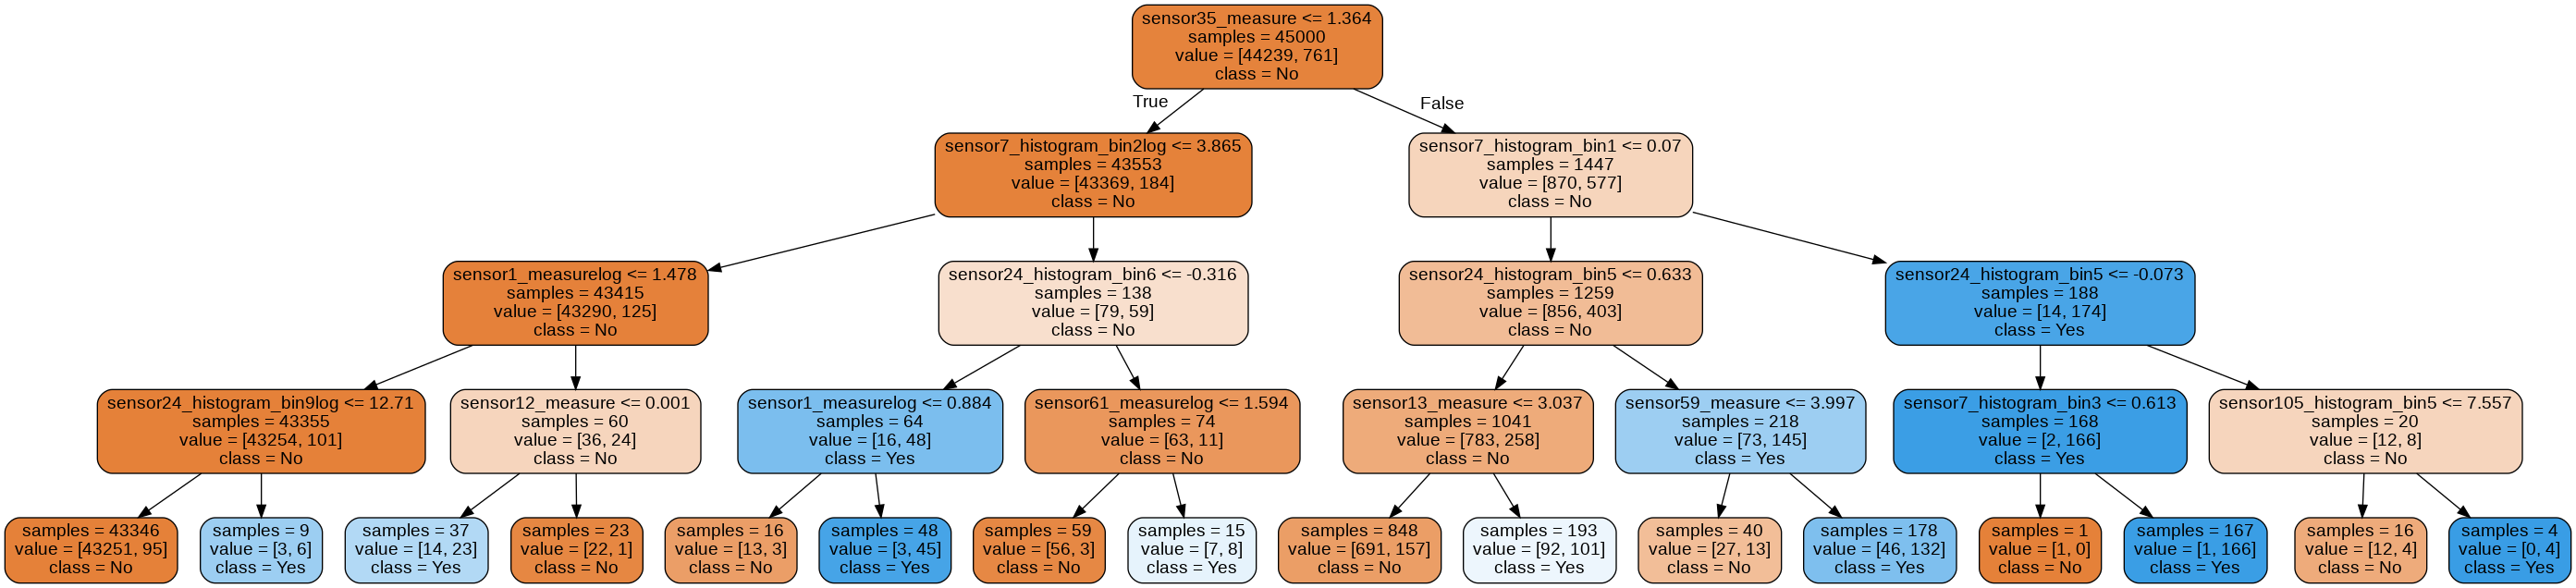

In [38]:
#visualizing tree diagram with Graphviz
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(extracted_train, target_train)

# Predicting results for valid dataset
y_pred = decision_tree.predict(extracted_val)
print("Accuracy:",accuracy_score(target_val, y_pred))
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = extracted_train.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [0]:
import xgboost as xgb
clf = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.25,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1500, 
                      reg_alpha = 0.3,
                      max_depth=5, 
gamma=10)

In [55]:
# clf.fit(extracted_train, target_train, eval_metric='auc', verbose=False,
#             eval_set=[(extracted_val, target_val)], early_stopping_rounds=200)
# y_pre = clf.predict(extracted_val)
# #y_pro = clf.predict_proba(test_data)[:, 1]
# #print "AUC Score : %f" % metrics.roc_auc_score(test_label, y_pro)
# print("Accuracy : %.4g" % accuracy_score(target_val, y_pre))

Accuracy : 0.9931


In [113]:
clf2 = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.8,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=500, 
                      reg_alpha = 0.005,
                      nthread=4,
                      max_depth=7, 
gamma=10)
clf2.fit(trainData, target_train, eval_metric='logloss', verbose=True,
            eval_set=[(validData, target_val)], early_stopping_rounds=200)
y_pre = clf2.predict(validData)
#y_pro = clf.predict_proba(test_data)[:, 1]
#print "AUC Score : %f" % metrics.roc_auc_score(test_label, y_pro)
print("Accuracy : %.4g" % accuracy_score(target_val, y_pre))

[0]	validation_0-logloss:0.68348
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.674005
[2]	validation_0-logloss:0.66469
[3]	validation_0-logloss:0.655545
[4]	validation_0-logloss:0.646575
[5]	validation_0-logloss:0.637776
[6]	validation_0-logloss:0.629184
[7]	validation_0-logloss:0.620747
[8]	validation_0-logloss:0.612491
[9]	validation_0-logloss:0.604387
[10]	validation_0-logloss:0.596396
[11]	validation_0-logloss:0.58854
[12]	validation_0-logloss:0.580823
[13]	validation_0-logloss:0.573265
[14]	validation_0-logloss:0.565807
[15]	validation_0-logloss:0.55852
[16]	validation_0-logloss:0.55136
[17]	validation_0-logloss:0.544316
[18]	validation_0-logloss:0.537339
[19]	validation_0-logloss:0.530522
[20]	validation_0-logloss:0.523837
[21]	validation_0-logloss:0.51727
[22]	validation_0-logloss:0.510782
[23]	validation_0-logloss:0.50443
[24]	validation_0-logloss:0.49816
[25]	validation_0-logloss:0.492032
[26]	validation_0-logloss:0.485964
[27]

In [0]:
xgb_predictions = clf2.predict(test)
xgb_predicted=pd.DataFrame(xgb_predictions, columns=['target'])
test_out = pd.concat([testId, xgb_predicted],axis=1)
test_out.to_csv('xgbOutlogLossfinal.csv', index=False)

In [0]:
s# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [50]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(trainData, target_train)
# Get our predictions
gb_predictions = gb.predict(validData)
print("Predictions have finished")

Predictions have finished


In [51]:
accuracy_score(target_val, gb_predictions)

0.9900666666666667

In [0]:
gb_predictions_test = gb.predict(test)

In [0]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = train.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = train.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')